Recuperação de Informação com base no Conteúdo Visual

Descrição de imagens

Descritor representa a propriedade de uma imagem. O descritor deve ser invariante a rotação, escala, etc.

Exemplo de uma forma (muito simples) de se obter uma representação númerica sobre a imagem por meio de histograma de cor.

In [2]:
import numpy as np
import cv2
#from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

In [3]:
img_lena = cv2.imread('/content/drive/My Drive/Visao/02_cbir/lena.png',0)
img_lena_bgr = cv2.imread('/content/drive/My Drive/Visao/02_cbir/lena.png')

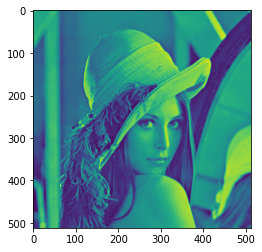

In [4]:
#Show the image with matplotlib
plt.imshow(img_lena)
plt.show()

In [7]:
%%time
#cv2.imshow('lena', img_lena)
#cv2.imshow('lena',img_lena)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

hist, bins = np.histogram(img_lena.ravel(),256,[0,256])

print(bins)
print(hist)

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 

Plotting Histograms

In [5]:
from matplotlib import pyplot as plt

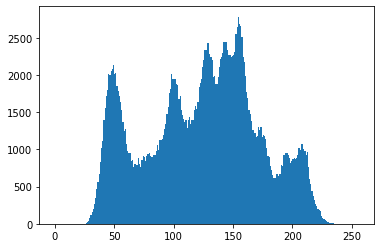

In [6]:
plt.hist(img_lena.ravel(),256,[0,256]); plt.show()

Histograma de cor da imagem nos três canais RGB

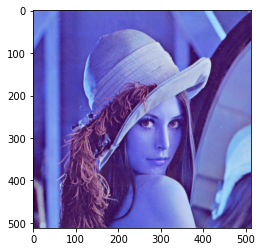

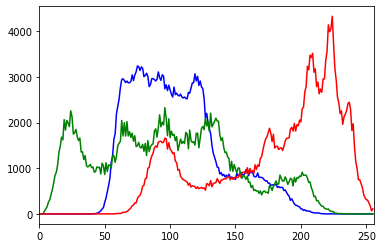

In [7]:
plt.imshow(img_lena_bgr)
plt.show()

color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img_lena_bgr],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])

plt.show()

**Feature Detection and Description**

**Features Locais**

Features locais: Padrão que se difere da vizinhança local. Pontos de interesse: cantos (corners), regiões, etc..

BRIEF (Binary Robust Independent Elementary Features)

In [8]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [13]:
# BRIEF não possui detector de pontos de interesse
# Initiate STAR detector
star = cv2.xfeatures2d.StarDetector_create()

# Initiate BRIEF extractor
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

AttributeError: module 'cv2.cv2' has no attribute 'xfeatures2d'

In [10]:
img_baggage = cv2.imread('/content/drive/My Drive/Visao/02_cbir/baggage_claim.jpg')    
gray = cv2.cvtColor(img_baggage,cv2.COLOR_BGR2GRAY)

In [ ]:
# find the keypoints with STAR
kp = star.detect(gray,None)

# compute the descriptors with BRIEF
kp, feat = brief.compute(gray, kp)

print(len(kp))
print(feat.shape)
print(feat)

ORB (Oriented FAST and Rotated BRIEF)

In [ ]:
# Initiate ORB detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = orb.detectAndCompute(gray,None)

print(np.shape(des1))
print(des1)

Matching de features locais entre duas imagens

In [13]:
import imutils

In [14]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [15]:
img1 = cv2.imread('/content/drive/My Drive/Visao/02_cbir/baggage_claim.jpg',0)             
img2 = cv2.imread('/content/drive/My Drive/Visao/02_cbir/baggage_claim.jpg',0)  

# rotate image 180° 
rotated = imutils.rotate(img2, 180)
img2 = rotated

In [ ]:
# find the keypoints and descriptors with SIFT
kp1, desc1 = orb.detectAndCompute(img1,None)
kp2, desc2 = orb.detectAndCompute(img2,None)

# Match descriptors.
matches = bf.match(desc1,desc2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=2)

plt.imshow(img3),plt.show()

In [ ]:
# rotate image 180° 
rotated = imutils.rotate(img_lena, 180)
img_lena_rotated = rotated

# find the keypoints and descriptors with SIFT
kp1, desc1 = orb.detectAndCompute(img_lena,None)
kp2, desc2 = orb.detectAndCompute(img_lena_rotated,None)

# Match descriptors.
matches = bf.match(desc1,desc2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img_lena_matches = cv2.drawMatches(img_lena,kp1,img_lena_rotated,kp2,matches[:10],None,flags=2)

plt.imshow(img_lena_matches),plt.show()

**Busca de vídeo com base em conteúdo visual**

Lendo um vídeo em OpenCV

Abre e extrai keyframes do vídeo salvando em disco

In [18]:
from os import listdir
from os.path import isfile, join
import os
import os.path
import sys
import pickle

In [19]:
frames_dir = "frames/"

features_dir = "features/"

cluster_dir = "cluster/"

bow_dir = "bow/"

if not os.path.exists(frames_dir):
    os.makedirs(frames_dir)  

if not os.path.exists(features_dir):
    os.makedirs(features_dir)  
  
if not os.path.exists(cluster_dir):
    os.makedirs(cluster_dir)  

if not os.path.exists(bow_dir):
    os.makedirs(bow_dir)

In [ ]:
# video path
video_dir = "videos/"

# video file
video = "/content/drive/My Drive/Visao/02_cbir/airport.mp4"

# create VideoCapture object and read from video file
cap = cv2.VideoCapture(video)

# frames per second
video_frames = 30

# frame id
id_frame = 0

ret = True
while ret:
    # capture frame by frame
    ret, frame = cap.read()

    # video length
    length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    if (id_frame % video_frames) == 0 and ret:

        print("Proccessing frame " + str(id_frame) + " of " + str(length))

        frame_path = os.path.join(frames_dir, str(id_frame) + ".png")

        # salva a imagem (frame) no disco
        cv2.imwrite(frame_path, frame)
    
    id_frame += 1
  
print("Done")

In [ ]:
frame = cv2.imread('frames/480.png')
cv2_imshow(frame)

Extraindo descritores do frames do vídeo usando BRIEF Descriptor

In [ ]:
# leitura das imagens do diretório
onlyfiles = []
if os.path.exists(frames_dir):
    onlyfiles = [f for f in listdir(frames_dir) if isfile(join(frames_dir, f))]
    
    # processa cada arquivo de imagem de um diretório
    for file in onlyfiles:

        print(file)
    
        img_path = join(frames_dir, file)

        img = cv2.imread(img_path)

        # opcional: redimensiona a imagem
        # img = cv2.resize(
        #  img, (160, 160), interpolation=cv2.INTER_CUBIC)
        
        # Initiate STAR detector
        star = cv2.xfeatures2d.StarDetector_create()

        # Initiate BRIEF extractor
        brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

        # find the keypoints with STAR
        kp = star.detect(img,None)

        # compute the descriptors with BRIEF
        kp, feat = brief.compute(img, kp)        

        print(len(kp))
        print(np.shape(feat))
        # print(feat)

        feat_path = join(features_dir, file)

        # store the data as binary data stream
        with open(feat_path + ".brief", "wb") as f:            
            pickle.dump(feat.tolist(), f)        

        # f = open(feat_path + ".brief.txt", "w")
        # f.write(str(feat.tolist()))
        # f.close()

Criação do vocabulário visual

1. Clusterização

In [23]:
from sklearn.cluster import KMeans
import time

In [24]:
cluster_file = cluster_dir + "cluster.cluster"

In [25]:
# número de clusters
k = 32

# núimeros de dimensões das features
dim = 32

In [26]:
# salva o vocabulário criado (centroids) em disco
def saveCentroids (kmeans, output_file, dim):
    i = 0
    desc = ""

    for k in np.nditer(kmeans.cluster_centers_):        
        a = np.array(k).round(2)
        desc += str(a) + " "
        i += 1        

        if (i % dim) == 0:
            desc += "\n" 

    output_file.write(desc)

In [ ]:
listOfFeat = []

# leitura das imagens do diretório
onlyfiles = []
if os.path.exists(features_dir):
    onlyfiles = [f for f in listdir(features_dir) if isfile(join(features_dir, f))]
    
    # processa cada arquivo de imagem de um diretório
    for file in onlyfiles:
        # print(file)
    
        feat_path = join(features_dir, file)

        with open(feat_path, 'rb') as f:
            # read the data as binary data stream
            feat = pickle.load(f)

        # print(feat)

        for item in feat:
            listOfFeat.append(item)

output_file = open(cluster_file, 'w')

# print( np.asarray(listOfFeat) )
print( np.asarray(listOfFeat).shape )
# output_file.write(np.asarray(listOfFeat[0]))
    
t1 = time.time()  
kmeans = KMeans(n_clusters=k, random_state=0).fit(np.asarray(listOfFeat))
t2 = time.time()
tf = t2 - t1

print(tf)

saveCentroids (kmeans, output_file, dim)  
output_file.close()

2. Bag of Visual Word

In [ ]:
%%time
# leitura dos centroids do arquivo
centroids = np.loadtxt(cluster_file)

# obtem o número de centroids (palavras visuais)
clusters = centroids.shape[0]

# leitura das imagens do diretório
onlyfiles = []
if os.path.exists(features_dir):
    onlyfiles = [f for f in listdir(features_dir) if isfile(join(features_dir, f))]

    bowOfImages = []    
    
    # processa cada arquivo de imagem de um diretório
    for file in onlyfiles:
    
        feat_path = join(features_dir, file)

        with open(feat_path, 'rb') as f:
            # read the data as binary data stream
            feat = pickle.load(f)        

        # inicializa o BoW da imagem com zero para cada dimensão
        bow = [0] * clusters

        # procedimento força bruta para cálculo de distância (euclidean distance)
        for item in feat:
            result = sys.float_info.max
            centroid_id = 0

            for id, c in enumerate(centroids):
               # Euclidean Distance 
               dist = np.sqrt(np.sum(np.square(np.subtract(item, c))))
               if dist < result:
                  result = dist
                  centroid_id = id

            bow[centroid_id] += 1                     
        
        bow_path = join(bow_dir, file)

        with open(bow_path + ".bow", 'w') as f:
            for item in bow:
                f.write("%s " % item)

print("Done")

Busca

Utilizando um arquivo de BoW de uma imagem do próprio vídeo

In [ ]:
%%time
# leitura das imagens do diretório

q = np.loadtxt(bow_dir + "450.png.brief.bow")

onlyfiles = []
if os.path.exists(bow_dir):
    onlyfiles = [f for f in listdir(bow_dir) if isfile(join(bow_dir, f))]

    # processa cada arquivo de imagem de um diretório
    for file in onlyfiles:

        feat_path = join(bow_dir, file)

        item = np.loadtxt(feat_path)

        # print(item)
        # print(item.shape)

        dist = np.sqrt(np.sum(np.square(np.subtract(item, q))))

        print(str(file) + ": " + str(dist))

Altere a quantidade de clsuter para k = 64 e repita o procedimento acima, compare os resultados de cálculo de distância. O que mudou em relação às distâncias calculadas?

Utilizando uma nova imagem qualquer

Calculando features locais da imagem de consulta

In [ ]:
frame = cv2.imread('/content/drive/My Drive/Visao/02_cbir/beluga.jpg')
cv2_imshow(frame)

In [32]:
q = '/content/drive/My Drive/Visao/02_cbir/beluga.jpg'
q_feature = q + ".brief"
q_bow = q_feature + ".bow"

In [ ]:
img_search = cv2.imread(q)

# Initiate STAR detector
star = cv2.xfeatures2d.StarDetector_create()

# Initiate BRIEF extractor
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

# find the keypoints with STAR
kp = star.detect(img_search,None)

# compute the descriptors with BRIEF
kp, feat = brief.compute(img_search, kp)        

print(len(kp))
print(np.shape(feat))
# print(feat)

# store the data as binary data stream
with open(q_feature, "wb") as f:            
  pickle.dump(feat.tolist(), f)        

Calculando BoW da imagem de consulta (observe que o mesmo vocabulário visual calculado anteriormente é utilizado)

In [ ]:
# leitura dos centroids do arquivo
centroids = np.loadtxt(cluster_file)

# obtem o número de centroids (palavras visuais)
clusters = centroids.shape[0]

with open(q_feature, 'rb') as f:
    # read the data as binary data stream
    feat = pickle.load(f)        

    # inicializa o BoW da imagem com zero para cada dimensão
    bow = [0] * clusters

    # procedimento força bruta para cálculo de distância (euclidean distance)
    for item in feat:
        result = sys.float_info.max
        centroid_id = 0

        for id, c in enumerate(centroids):
            dist = np.sqrt(np.sum(np.square(np.subtract(item, c))))
            if dist < result:
              result = dist
              centroid_id = id

        bow[centroid_id] += 1                     

    with open(q_bow, 'w') as f:
        for item in bow:
            f.write("%s " % item)

print("Done")

Realizando a consulta

In [ ]:
# leitura das imagens do diretório

q = np.loadtxt(q_bow)

onlyfiles = []
if os.path.exists(bow_dir):
    onlyfiles = [f for f in listdir(bow_dir) if isfile(join(bow_dir, f))]

    # processa cada arquivo de imagem de um diretório
    for file in onlyfiles:

        feat_path = join(bow_dir, file)

        item = np.loadtxt(feat_path)

        # print(item)
        # print(item.shape)

        dist = np.sqrt(np.sum(np.square(np.subtract(item, q))))

        print(str(file) + ": " + str(dist))

In [ ]:
frame = cv2.imread('frames/450.png')
cv2_imshow(frame)